In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import find_peaks
from scipy import signal

In [36]:
df = pd.read_csv('ecgdata.csv')

In [37]:
df

,time,ecg
0,729.500,0.546875
1,729.501,0.553125
2,729.502,0.540625
3,729.503,0.537500
4,729.504,0.553125
...,...,...
309995,1039.495,0.006250
309996,1039.496,0.009375
309997,1039.497,0.018750
309998,1039.498,0.003125


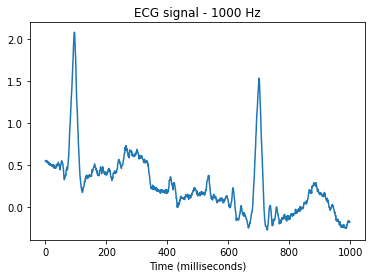

In [38]:
plt.title("ECG signal - 1000 Hz")
plt.plot(dataset.ecg[0:5000])
plt.xlabel('Time (milliseconds)')
plt.show()

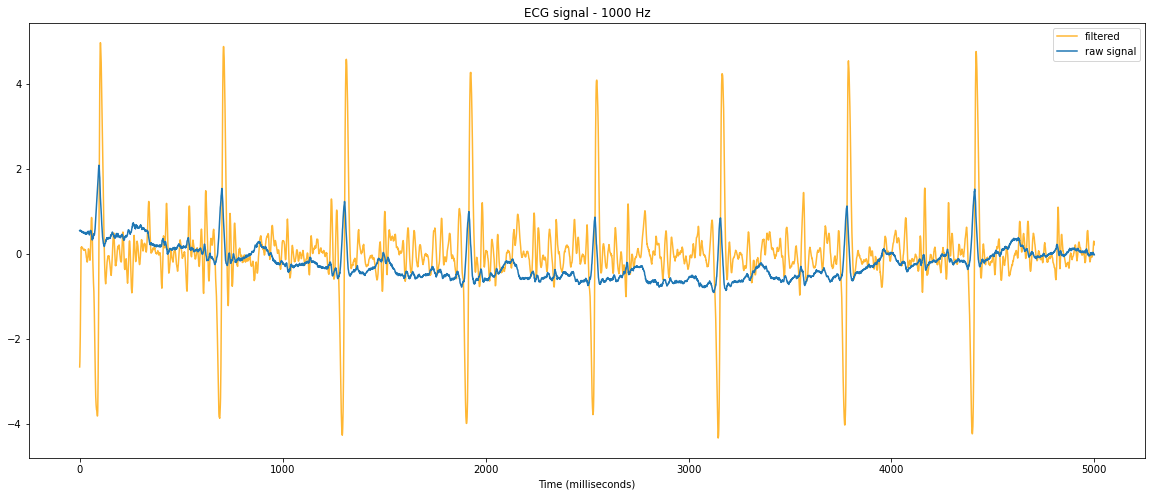

In [39]:
# linear spaced vector between 0.5 pi and 1.5 pi 
v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)

# create sine filter for approximating QRS feature
peak_filter = np.sin(v)

# compute cross correlation between ecg and the sine filter
ecg_transformed = np.correlate(df.ecg, peak_filter, mode="same")

# and plot the raw + filtered signal
plt.figure(figsize=(20,8))
plt.title('ECG signal - 1000 Hz')
plt.plot(ecg_transformed[0:5000], alpha = 0.8, c='orange')
plt.plot(df.ecg[0:5000], alpha = 1)
plt.gca().legend(('filtered','raw signal'))
plt.xlabel('Time (milliseconds)')
plt.show()

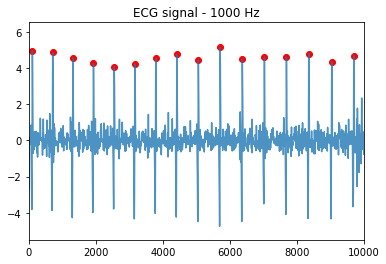

In [69]:
diff_sig_ecg = np.diff(df['ecg'])

rr_peaks, _ = find_peaks(ecg_transformed,distance=1000*(30/60))
plt.plot(ecg_transformed, alpha = 0.8)
plt.scatter(rr_peaks, ecg_transformed[rr_peaks], color='red')
plt.xlim(0,10000)
plt.title("ECG signal - 1000 Hz")
plt.show()

In [68]:
print(ecg_transformed[rr_peaks])

[4.96973521 4.87915804 4.57792948 4.26098562 4.27033997 4.08859631
 4.23762576 4.22290291 4.54258731 4.76131679 4.46117888 5.17383887
 4.49974255 4.61531281 4.62013928 4.81249082 4.3643107  4.69304452
 4.22361633 4.72663171 3.57843096 4.5171757  4.98081268 4.53970969
 4.26531462 4.27535806 4.22673918 4.46013016 4.38623771 4.58889936
 4.27894534 4.41904205 4.18720823 4.63845334 4.2992828  4.67548018
 4.7641001  5.20023038 4.25488942 4.53529795 4.35167814 4.80851571
 5.28534441 4.59728735 4.70281764 4.29418112 4.35094147 4.8827343
 4.6315731  4.18307537 4.12571988 4.32345391 4.87468786 4.55569688
 5.05973359 4.3127902  4.71525625 4.37336172 4.91001113 4.38523961
 5.22270616 4.63031479 4.43476882 4.42359922 4.53087549 4.79170647
 4.75302734 4.62708644 4.8390354  4.55197257 4.43395181 4.79004413
 4.86578972 4.60249134 4.71377399 4.20176988 4.65030772 5.02557861
 4.28340887 4.02935196 4.33852742 4.31779754 4.59002962 4.29457845
 5.20719463 4.68315389 4.27329533 4.45508867 4.217067   4.72037

In [66]:
print(rr_peaks)

[   102    709   1314   1925   1927   2548   3165   3167   3788   4417
   5060   5712   6372   7033   7690   8357   9044   9702  10339  10979
  11604  11606  11613  12216  12827  13446  14075  14728  15395  16057
  16720  17369  18027  18702  19389  20087  20780  21450  22116  22799
  23495  24188  24908  25593  26257  26917  27578  28261  28942  29608
  30267  30943  31628  32339  33041  33712  34370  35050  35730  36409
  37080  37742  38394  39058  39761  40490  41206  41882  42540  43197
  43870  44558  45246  45907  46559  47223  47898  48571  49273  49956
  50642  51347  52051  52747  53444  54118  54784  55447  56118  56798
  57470  58123  58770  59431  60090  60767  61455  62124  62770  63426
  64106  64773  65424  66059  66707  67367  68026  68683  69341  70013
  70692  71374  72023  72680  73342  74006  74671  75330  75969  76615
  77285  77958  78662  79346  80009  80672  81345  82012  82014  82680
  83340  83998  84677  85351  86013  86657  87298  87963  88647  89331
  9000

In [84]:
print(len(rr_peaks))

475


In [85]:
r=len(rr_peaks)

In [88]:
heart_rate= r*(10/60)

In [89]:
print(heart_rate)

79.16666666666666
